> <center><h2>Identifying mental health disorders Artificial Intelligence using Natural Language Processing & Deep Learning Techniques</h2>
> <br><h3>Zacharias Siatris</h3>
> <h3>MSc in Artificial Intelligence
    The University of Bath<br>2022 - 2023</h3></center><br><br><br>

### Init and Train MLP Model (under development)

> ☝🏻 This is the place where you might want to play with model configuration.

> ⚠️ Be aware though that the training of the neural network with current parameters may take up to 15 minutes depending on the hardware. 

- `layers` - configuration of the multilayer perceptron layers (array of numbers where every number represents the number of nayron in specific layer).
- `max_iterations` - this is the maximum number of iterations that gradient descent algorithm will use to find the minimum of a cost function. Low numbers may prevent gradient descent from reaching the minimum. High numbers will make the algorithm work longer without improving its accuracy.
- `regularization_param` - parameter that will fight overfitting. The higher the parameter, the simplier is the model will be.
- `normalize_data` - boolean flag that indicates whether data normalization is needed or not.
- `alpha` - the size of gradient descent steps. You may need to reduce the step size if gradient descent can't find the cost function minimum. 

### Import Dependencies (under development)

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [math](https://docs.python.org/3/library/math.html) - math library that we will use to calculate sqaure roots etc.
- [neural_network](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/neural_network/multilayer_perceptron.py) - custom implementation of multilayer perceptron

In [1]:
!pip install nltk
!pip install tensorflow
!pip install transformers
!pip install scikeras
!pip install wordcloud
!pip install packaging


import time
import pandas as pd
import nltk
import re, string
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import distutils


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline

from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from collections import OrderedDict
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')

start_time = time.time()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZachariasSiatris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZachariasSiatris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZachariasSiatris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZachariasSiatris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ZachariasSiatris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [math](https://docs.python.org/3/library/math.html) - math library that we will use to calculate sqaure roots etc.
- [neural_network](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/neural_network/multilayer_perceptron.py) - custom implementation of multilayer perceptron

In [2]:
pd.set_option('display.colheader_justify', 'center')
pd.set_option('expand_frame_repr', False)
np.set_printoptions(suppress=True)
english_stop_words = stopwords.words('english')
 

load_big_datasets = False
print_word_cloud_per_disorder = True
print_dataset_each_step = True
number_of_rows_to_print = 20

use_nlp_validation_model = False

> <br><br><center><h1>Mental Health Disorder Datasets</h1><br><br>

In [3]:
if load_big_datasets:
    files = 'CSV_Files_Large_Datasets'
else:
    files = 'CSV_Files_Small_Datasets'


BPD_dataframe = pd.read_csv(
    'Datasets/' + files + '/BPD_Disorder_Dataset.csv')
ANXIETY_dataframe = pd.read_csv(
    'Datasets/' + files + '/Anxiety_Disorder_Dataset.csv')
BIPOLAR_dataframe = pd.read_csv(
    'Datasets/' + files + '/Bipolar_Disorder_Dataset.csv')
DEPRESSION_dataframe = pd.read_csv(
    'Datasets/' + files + '/Depression_Disorder_Dataset.csv')
EATING_dataframe = pd.read_csv(
    'Datasets/' + files + '/Eating_Disorder_Dataset.csv')
GENERAL_dataframe = pd.read_csv(
    'Datasets/' + files + '/General_Mental_Illnesses_Disorder_Dataset.csv')
PSYCHOTIC_dataframe = pd.read_csv(
    'Datasets/' + files + '/Schizophrenia_Disorder_Dataset.csv')
GENDER_dataframe = pd.read_csv(
    'Datasets/' + files + '/Sexual_and_Gender_Identity_Disorder_Dataset.csv')


# Merging dataframes
merged_dataframes = [BPD_dataframe, ANXIETY_dataframe, BIPOLAR_dataframe,
                     DEPRESSION_dataframe, EATING_dataframe, GENERAL_dataframe, PSYCHOTIC_dataframe, GENDER_dataframe]
# print(merged_dataframes)
merged_dataframes = pd.concat(merged_dataframes).reset_index(drop=True)

> <br><br><center><h1>Natural Language Processing (Validation Model)</h1><br><br>

In [4]:
def validation_nlp(dataframe):
    
    # This is where the second nlp model (validation) is used for sentiment analysis. If the use_nlp_validation is True
    # it will execute the code, else it will move on to the last sentence to return the dataframe
    if use_nlp_validation_model:
        
        print("\n\nVALIDATION NLP Model for Sentiment Analysis has been initiated\n")
        dataframe = dataframe.dropna()
        
        # Using transformers NLP model to classify the context of being positive or negative  
        # Method from hugging face (transformers) that uses a pre-trained NLP model to classify a context as positive or negative
        sentiment_classifier = pipeline("sentiment-analysis")
        dataframe['sentiment'] = [sentiment_classifier(' '.join(row), max_length=512)[0].get('label') for row in dataframe['text']]

        # Removing rows from the dataset where the sentiment analysis is positive
        dataframe.drop(dataframe[(dataframe['sentiment'] == 'POSITIVE')].index, inplace=True)
        
        print_dataset(dataframe) 
    
    return dataframe

> <br><br><center><h1>Natural Language Processing (Implementation Model)</h1><br><br>

In [5]:
# Method to remove contractions
def removing_contractions(line):
    
    # lines with special character (')
    line = line.replace("’", "'")
    
    # Replacing abbreviations for mental health disorders
    line = re.sub(" aspd ", " antisocial personality disorder ", line)
    line = re.sub(" add ", " attention deficit disorder ", line)
    line = re.sub(" adhd ", " attention deficit hyperactivity disorder ", line)
    line = re.sub(" avpd ", " avoidant personality disorder ", line)
    line = re.sub(" bdd ", " body dysmorphic disorder ", line)
    line = re.sub(" bpd ", " borderline personality disorder ", line)
    line = re.sub(" crsd ", " circadian rhythm sleep disorder ", line)
    line = re.sub(" ednos ", " eating disorder not otherwise specified ", line)
    line = re.sub(" gad ", " generalized anxiety disorder ", line)
    line = re.sub(" nes ", " night eating syndrome ", line)
    line = re.sub(" mdd ", " major depressive disorder ", line)
    line = re.sub(" ocd ", " obsessive-compulsive disorder ", line)
    line = re.sub(" odd ", " oppositional defiant disorder ", line)
    line = re.sub(" ppd ", " paranoid personality disorder ", line)
    line = re.sub(" pted ", " post traumatic embitterment disorder ", line)
    line = re.sub(" ptsd ", " post traumatic stress disorder ", line)
    line = re.sub(" sza ", " schizoaffective disorder ", line)
    line = re.sub(" spd ", " schizoid personality disorder ", line)
    line = re.sub(" dae ", " does anybody else ", line)
    line = re.sub(" fp ", " favourite person ", line)


    # Replacing top slang words used in tweets, posts, etc.
    line = re.sub(" imma ", " I am going to ", line)
    line = re.sub(" wanna ", " I want to ", line)
    line = re.sub(" lemme ", " let me ", line)
    line = re.sub(" kinda ", " kind of ", line)
    line = re.sub(" init ", " is not it ", line)
    line = re.sub(" gotta ", " got to ", line)
    line = re.sub(" gonna ", " going to ", line)
    line = re.sub(" gona ", " going to ", line)
    line = re.sub(" gimme ", " give me ", line)
    line = re.sub(" yr ", " year ", line)
    line = re.sub(" yrs ", " years ", line)
    line = re.sub(" bc ", " because ", line)
    line = re.sub(" cuz ", " because ", line)
    line = re.sub("idk", " I do not know ", line)
    line = re.sub(" bf ", " boyfriend ", line)
    line = re.sub(" gf ", " girlfriend ", line)


    # Replacing abbreviations in English language
    line = re.sub(r"ain't", "is not", line)
    line = re.sub(r"aren't", "are not", line)
    line = re.sub(r" arent ", " are not ", line)
    line = re.sub(r"can't", "cannot", line)
    line = re.sub(r" cant ", " cannot ", line)
    line = re.sub(r"can't've", "cannot have", line)
    line = re.sub(r"'cause", "because", line)
    line = re.sub(r"could've", "could have", line)
    line = re.sub(r"couldn't", "could not", line)
    line = re.sub(r" couldnt ", " could not ", line)
    line = re.sub(r"couldn't've", "could not have", line)
    line = re.sub(r"didn't", "did not", line)
    line = re.sub(r" didnt ", " did not ", line)
    line = re.sub(r"doesn't", "does not", line)
    line = re.sub(r" doesnt ", " does not ", line)
    line = re.sub(r"don't", "do not", line)
    line = re.sub(r" dont ", " do not ", line)
    line = re.sub(r"hadn't", "had not", line)
    line = re.sub(r" hadnt ", " had not ", line)
    line = re.sub(r"hadn't've", "had not have", line)
    line = re.sub(r"hasn't", "has not", line)
    line = re.sub(r" hasnt ", " has not ", line)
    line = re.sub(r"haven't", "have not", line)
    line = re.sub(r" havent ", " have not ", line)
    line = re.sub(r"he'd", "he would", line)
    line = re.sub(r"he'd've", "he would have", line)
    line = re.sub(r"he'll", "he will", line)
    line = re.sub(r"he'll've", "he he will have", line)
    line = re.sub(r"he's", "he is", line)
    line = re.sub(r"how'd", "how did", line)
    line = re.sub(r"how'd'y", "how do you", line)
    line = re.sub(r"how'll", "how will", line)
    line = re.sub(r"how's", "how is", line)
    line = re.sub(r" hows ", " how is ", line)
    line = re.sub(r"i'd", "i would", line)
    line = re.sub(r"i'd've", "i would have", line)
    line = re.sub(r"i'll", "i will", line)
    line = re.sub(r"i'll've", "i will have", line)
    line = re.sub(r"i'm", "i am", line)
    line = re.sub(r" im ", " i am ", line)
    line = re.sub(r"i've", "i have", line)
    line = re.sub(r" ive ", " i have ", line)
    line = re.sub(r"isn't", "is not", line)
    line = re.sub(r" isnt ", " is not ", line)
    line = re.sub(r"it'd", "it would", line)
    line = re.sub(r"it'd've", "it would have", line)
    line = re.sub(r"it'll", "it will", line)
    line = re.sub(r"it'll've", "it will have", line)
    line = re.sub(r"it's", "it is", line)
    line = re.sub(r"let's", "let us", line)
    line = re.sub(r" lets ", " let us ", line)
    line = re.sub(r"ma'am", "madam", line)
    line = re.sub(r"mayn't", "may not", line)
    line = re.sub(r"might've", "might have", line)
    line = re.sub(r"mightn't", "might not", line)
    line = re.sub(r"mightn't've", "might not have", line)
    line = re.sub(r"must've", "must have", line)
    line = re.sub(r"mustn't", "must not", line)
    line = re.sub(r" mustnt ", " must not ", line)
    line = re.sub(r"mustn't've", "must not have", line)
    line = re.sub(r"needn't", "need not", line)
    line = re.sub(r" neednt ", " need not ", line)
    line = re.sub(r"needn't've", "need not have", line)
    line = re.sub(r"no where", "nowhere", line)
    line = re.sub(r"o'clock", "of the clock", line)
    line = re.sub(r"oclock", "of the clock", line)
    line = re.sub(r"oughtn't", "ought not", line)
    line = re.sub(r"oughtn't've", "ought not have", line)
    line = re.sub(r"shan't", "shall not", line)
    line = re.sub(r"sha'n't", "shall not", line)
    line = re.sub(r"shan't've", "shall not have", line)
    line = re.sub(r"she'd", "she would", line)
    line = re.sub(r"she'd've", "she would have", line)
    line = re.sub(r"she'll", "she will", line)
    line = re.sub(r"she'll've", "she will have", line)
    line = re.sub(r"she's", "she is", line)
    line = re.sub(r"should've", "should have", line)
    line = re.sub(r"shouldn't", "should not", line)
    line = re.sub(r" shouldnt ", " should not ", line)
    line = re.sub(r"shouldn't've", "should not have", line)
    line = re.sub(r"so've", "so have", line)
    line = re.sub(r"so's", "so as", line)
    line = re.sub(r"that'd", "that would", line)
    line = re.sub(r"that'd've", "that would have", line)
    line = re.sub(r"that's", "that is", line)
    line = re.sub(r" thats ", " that is ", line)
    line = re.sub(r"there'd", "there would", line)
    line = re.sub(r"there'd've", "there would have", line)
    line = re.sub(r"there's", "there is", line)
    line = re.sub(r"theres", "there is", line)
    line = re.sub(r"they'd", "they would", line)
    line = re.sub(r"they'd've", "they would have", line)
    line = re.sub(r"they'll", "they will", line)
    line = re.sub(r"they'll've", "they will have", line)
    line = re.sub(r"they're", "they are", line)
    line = re.sub(r"they've", "they have", line)
    line = re.sub(r"to've", "to have", line)
    line = re.sub(r"wasn't", "was not", line)
    line = re.sub(r" wasnt ", " was not ", line)
    line = re.sub(r"we'd", "we would", line)
    line = re.sub(r"we'd've", "we would have", line)
    line = re.sub(r"we'll", "we will", line)
    line = re.sub(r"we'll've", "we will have", line)
    line = re.sub(r"we're", "we are", line)
    line = re.sub(r"we've", "we have", line)
    line = re.sub(r"weren't", "were not", line)
    line = re.sub(r" werent ", " were not ", line)
    line = re.sub(r"what'll", "what will", line)
    line = re.sub(r"what'll've", "what will have", line)
    line = re.sub(r"what're", "what are", line)
    line = re.sub(r"what's", "what is", line)
    line = re.sub(r" whats ", " what is ", line)
    line = re.sub(r"what've", "what have", line)
    line = re.sub(r"when's", "when is", line)
    line = re.sub(r"when've", "when have", line)
    line = re.sub(r"where'd", "where did", line)
    line = re.sub(r"where's", "where is", line)
    line = re.sub(r"where've", "where have", line)
    line = re.sub(r"who'll", "who will", line)
    line = re.sub(r"who'll've", "who will have", line)
    line = re.sub(r"who's", "who is", line)
    line = re.sub(r"who've", "who have", line)
    line = re.sub(r"why's", "why is", line)
    line = re.sub(r"why've", "why have", line)
    line = re.sub(r"will've", "will have", line)
    line = re.sub(r"won't", "will not", line)
    line = re.sub(r" wont ", " will not ", line)
    line = re.sub(r"won't've", "will not have", line)
    line = re.sub(r"would've", "would have", line)
    line = re.sub(r"wouldn't", "would not", line)
    line = re.sub(r" wouldnt ", " would not ", line)
    line = re.sub(r"wouldn't've", "would not have", line)
    line = re.sub(r"y'all", "you all", line)
    line = re.sub(r"y'all'd", "you all would", line)
    line = re.sub(r"y'all'd've", "you all would have", line)
    line = re.sub(r"y'all're", "you all are", line)
    line = re.sub(r"y'all've", "you all have", line)
    line = re.sub(r"you'd", "you would", line)
    line = re.sub(r"you'd've", "you would have", line)
    line = re.sub(r"you'll", "you will", line)
    line = re.sub(r"you'll've", "you will have", line)
    line = re.sub(r"you're", "you are", line)
    line = re.sub(r" youre ", " you are ", line)
    line = re.sub(r"you've", "you have", line)
    line = re.sub(r"etc", " ", line)

    return line



# function to remove non-ASCII
def remove_non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)



def spell_checking(word):
    result = Word(word)
    print(result.spellcheck())
    


# Method to clear out rows with empty cells, replace non-ASCII characters and remove contractions
def pre_processing_data(dataframe):
    # Deleting rows from the dataset where rows are empty
    dataframe = dataframe.dropna()

    # Deleting duplicate rows from the dataset
    dataframe = dataframe.drop_duplicates()

    # Applying ASCII encoding first flagging data with errors="ignore" flag, then subsequently decoding it into ASCII
    dataframe['text'] = dataframe['text'].apply(remove_non_ascii)

    # Removing newline characters
    dataframe['text'] = dataframe['text'].replace(r'\n', ' ', regex=True)

    # Removing the character reference "An ampersand"
    dataframe['text'] = dataframe['text'].replace('&amp;', ' ', regex=True)

    # Converts uppercase characters to lowercase
    dataframe['text'] = dataframe['text'].str.lower()

    # Replacing contractions to original words
    dataframe['text'] = dataframe['text'].apply(removing_contractions)

    return dataframe



# Method to tokenize the text into tokens (words)
def tokenize_dataframe(dataframe):
    for index, row in dataframe.iterrows():
        row['text'] = nltk.word_tokenize(row['text'])

    return dataframe



# Method to lemmatize each word in the text column of the dataframe
def lemmatize_sentence(dataframe):
    lemmatizer = WordNetLemmatizer()

    for index, row in dataframe.iterrows():
        lemmatized_phrase = []

        for word, tag in pos_tag(row['text']):
            if tag.startswith('NN'):
                pos = 'n'
            elif tag.startswith('VB'):
                pos = 'v'
            else:
                pos = 'a'
            lemmatized_phrase.append(lemmatizer.lemmatize(word, pos))
            
        dataframe.at[index, 'text'] = " ".join(lemmatized_phrase)

    return dataframe



# Method to remove emoticons, flags and special characters
def remove_emojis(line):
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"
                      u"\u3030"
                      "]+", re.UNICODE)

    return re.sub(emoj, '', line)



# Method to remove noise from the data (meaning: stop words, emojis and special characters, urls, etc.)
def remove_noise(dataframe, stop_words):
    dataframe['text'] = dataframe['text'].str.replace('\d+', '', regex=True)
    dataframe['text'] = dataframe['text'].str.replace('\W', ' ', regex=True)
    dataframe['text'] = dataframe['text'].apply(lambda x: re.split('http.*', str(x))[0])
    
    for index, row in dataframe.iterrows():
        cleaned_phrase = []

        for word in row['text'].split():
            word = re.sub('(@[A-Za-z0-9_]+)', '', word)
            word = remove_emojis(word)

            if len(word) >= 1 and word not in string.punctuation and word not in stop_words:
                cleaned_phrase.append(word)

        dataframe.at[index, 'text'] = " ".join(cleaned_phrase)

    return dataframe



# Method to unify words into text and remove duplicates. Also it removes rows that have only few words as context (
# using 10 as minimum threshold)
def remove_rows_with_few_words(dataframe):

    dataframe['text'] = (dataframe['text'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
    dataframe = dataframe.loc[dataframe['text'].str.count(' ').gt(10)]

    return dataframe



def create_tfidf_model(dataframe):
    # TfidfVectorizer

    tfidf_vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.98, ngram_range=(1, 2), stop_words='english')
    X = dataframe['text']
    Y = dataframe['mental_health_disorder']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    X_train = tfidf_vectorizer.fit_transform(X_train).todense()
    X_test = tfidf_vectorizer.transform(X_test).todense()

    # print(pd.DataFrame(x_train_2, columns = vectorizer.get_feature_names_out()))    

    return X_train, X_test, Y_train, Y_test, tfidf_vectorizer



def print_dataset(dataframe):
    if print_dataset_each_step:
        print("Printing first " + str(number_of_rows_to_print) + " rows of the dataframe:\n")
        print(dataframe.head(number_of_rows_to_print))

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [math](https://docs.python.org/3/library/math.html) - math library that we will use to calculate sqaure roots etc.
- [neural_network](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/neural_network/multilayer_perceptron.py) - custom implementation of multilayer perceptron

In [6]:
def initiate_nlp(dataframe):
    
    print("\n\nMain NLP Model has been initiated\n")
    print_dataset(dataframe)

    
    # Starting with the first method for processing the data (STEP 1)
    print("\n\nSTEP 1 STARTED: Pre-processing dataset\n")
    dataframe = pre_processing_data(dataframe)
    print_dataset(dataframe)
    
    
    # Tokenizing the data (STEP 2)
    print("\n\nSTEP 2 STARTED: Tokenizing dataset\n")
    dataframe = tokenize_dataframe(dataframe)
    print_dataset(dataframe)
    

    # Lemmatizing the data of the dataframe (STEP 3)
    print("\n\nSTEP 3 STARTED: Lemmatizing dataset\n")
    dataframe = lemmatize_sentence(dataframe)
    print_dataset(dataframe)
    

    # Removing noise (STEP 4)
    print("\n\nSTEP 4 STARTED: Removing noise from the dataset\n")
    dataframe = remove_noise(dataframe, english_stop_words)
    print_dataset(dataframe)
    

    # Deleting rows after the processing where cells are empty (if any)
    dataframe = dataframe.dropna()
    
    
    # Removing rows with few words as context (STEP 5)
    print("\n\nSTEP 5 STARTED: Removing rows with few words from the dataset\n")
    dataframe = remove_rows_with_few_words(dataframe)
    print_dataset(dataframe)   
    
    
    # Removing rows with few words as context (STEP 6)
    print("\n\nSTEP 6 STARTED: Term Frequency-Inverse Document Frequency\n")
    X_train, X_test, Y_train, Y_test, tfidf_vectorizer = create_tfidf_model(dataframe)
    print_dataset(dataframe)   


    return X_train, X_test, Y_train, Y_test, tfidf_vectorizer

> <br><br><center><h1>Deep Learning Model</h1><br><br>

In [7]:
'''
In Python, the random.seed function generates “random numbers.” However, random numbers are not truly random. 
The numbers generated are pseudorandom, meaning the numbers are generated by a complicated formula that makes it look random. 
In order to generate numbers, the formula takes the previous value generated as its input. 

If there is no previous value generated, it often takes the time as a first value. That is why we seed the generator — to make 
sure that we always get the same random numbers. We provide a fixed value that the number generator can start with, which is 
zero in this case.

'''


# Parameters for Deep Learning Model
np.random.seed(0)
nb_classes = len(merged_dataframes["mental_health_disorder"].unique())
batch_size = 64
nb_epochs = 20
    


# Building Deep Learning Model
def build_deep_learning_model():
    
    model = Sequential()
    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model


# Testing Deep Learning Model
def test_deep_learning_model(X_train, X_test, Y_train, Y_test, deep_learning_model, encoder):
    
    y_train_predictions = deep_learning_model.predict(X_train, batch_size)
    y_test_predictions = deep_learning_model.predict(X_test, batch_size)

    
    y_train_predicted_max_values = np.argmax(y_train_predictions, axis=1)
    y_train_predicted_max_values = [encoder.classes_[i] for i in y_train_predicted_max_values]

    y_test_predicted_max_values = np.argmax(y_test_predictions, axis=1)
    y_test_predicted_max_values = [encoder.classes_[i] for i in y_test_predicted_max_values]
    
    
    
    train_score = round(accuracy_score(Y_train, y_train_predicted_max_values), 4)
    train_report = classification_report(Y_train, y_train_predicted_max_values)
    
    test_score = round(accuracy_score(Y_test, y_test_predicted_max_values), 4)
    test_report = classification_report(Y_test, y_test_predicted_max_values)
    
    results = train_score, train_report, test_score, test_report
    
    return results

In [8]:
def initiate_deep_learning(X_train, X_test, Y_train, Y_test):
    
    # Encoding from categorical to numerical values the labels of the Deep Learning Model
    encoder = LabelEncoder()
    encoder.fit(Y_train)
    encoded_Y = encoder.transform(Y_train)
    y_encoded_train = np_utils.to_categorical(encoded_Y, nb_classes)
    
    
    # Building Deep Learning Model
    deep_learning_model = build_deep_learning_model()
    
    
    # Training Deep Learning Model
    history = deep_learning_model.fit(X_train, y_encoded_train, batch_size, epochs=nb_epochs, verbose=1)
    
    
    # Testing Deep Learning Model
    results = test_deep_learning_model(X_train, X_test, Y_train, Y_test, deep_learning_model, encoder)
    
    return history, results

In [9]:
# print(pd.DataFrame(Y_train.astype(int), columns = encoder.classes_).head(10))

merged_dataframes = validation_nlp(merged_dataframes)

X_train, X_test, Y_train, Y_test, tfidf_vectorizer = initiate_nlp(merged_dataframes)

history, results = initiate_deep_learning(X_train, X_test, Y_train, Y_test)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.




VALIDATION NLP Model for Sentiment Analysis has been initiated



All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\ZachariasSiatris\AppData\Local\Temp\ipykernel_17436\594796530.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Printing first 20 rows of the dataframe:

                          text                        mental_health_disorder sentiment
0   Does anyone else think the most important part...           Bpd           NEGATIVE
1   Hello fellow friends 😄\n\nI'm on the BPD spect...           Bpd           NEGATIVE
2   My [F20] bf [M20] told me today (after I said ...           Bpd           NEGATIVE
3   Okay, I’m about to open up about many things I...           Bpd           NEGATIVE
4   Without going into detail, this diagnosis expl...           Bpd           NEGATIVE
5   (Reposting here on the larger sub on recommend...           Bpd           NEGATIVE
6   I grew up mostly dating men but realized when ...           Bpd           NEGATIVE
7   I posted on this sub earlier today about havin...           Bpd           NEGATIVE
8   If they were to tell you that you were being o...           Bpd           NEGATIVE
9   I am in a really dark moment in my life right ...           Bpd           NEGATIVE
1

Printing first 20 rows of the dataframe:

                          text                        mental_health_disorder sentiment
0   anyone else think important part life relation...           Bpd           NEGATIVE
1   hello fellow friend borderline personality dis...           Bpd           NEGATIVE
2   f boyfriend tell today say wish could good lik...           Bpd           NEGATIVE
3   okay open many thing past proud person anymore...           Bpd           NEGATIVE
4   without go detail diagnosis explain much sudde...           Bpd           NEGATIVE
5   reposting large sub recommendation people smal...           Bpd           NEGATIVE
6   grow mostly date men realize teenager also lik...           Bpd           NEGATIVE
7   post sub early today trouble believe boyfriend...           Bpd           NEGATIVE
8   tell overdramatic would react feel last straw ...           Bpd           NEGATIVE
9   really dark moment life right husband control ...           Bpd           NEGATIVE
1

In [25]:
### end_time = time.time()
total_time = end_time - start_time

print("\n********************************************************************************************\n")
print(total_time)


********************************************************************************************

3365.151449203491


> <br><br><center><h1> Results & Visualizations</h1><br><br>


A <b>word cloud</b> is a data visualization technique that shows the most used words in a list given as input. If you wish to see the word cloud images make sure you have set the variable <i>print_word_cloud_per_disorder</i> to <b>True</b>

In [11]:
print()
print("Deep Neural Network - Train accuracy:" + str(results[0]))
print("Deep Neural Network - Train Classification Report\n")
print(results[1])

print("\n\n***********************************\n\n")

print()
print("Deep Neural Network - Test accuracy:" + str(results[2]))
print("Deep Neural Network - Test Classification Report\n")
print(results[3])


Deep Neural Network - Train accuracy:0.9984
Deep Neural Network - Train Classification Report

                           precision    recall  f1-score   support

                  Anxiety       1.00      0.99      1.00       700
                  Bipolar       1.00      1.00      1.00       626
                      Bpd       1.00      1.00      1.00       784
               Depression       1.00      1.00      1.00       644
          Eating_disorder       1.00      1.00      1.00       318
Gender_Dysphoria_Disorder       1.00      1.00      1.00       720
         General_disorder       0.99      1.00      1.00       695
            Schizophrenia       1.00      1.00      1.00       603

                 accuracy                           1.00      5090
                macro avg       1.00      1.00      1.00      5090
             weighted avg       1.00      1.00      1.00      5090



***********************************



Deep Neural Network - Test accuracy:0.5892
Deep Neural N

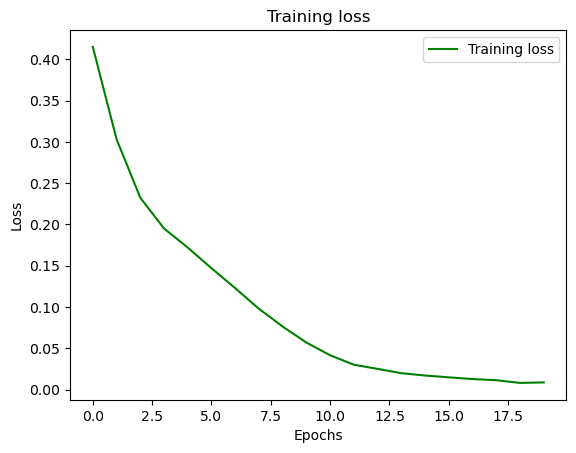

In [12]:
# print(history.history)
loss_train = history.history['loss']
# loss_val = history.history['val_loss']
epochs = range(0, nb_epochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Method to create plot with the most used words per mental health disorder
def create_word_cloud(label):
    if print_word_cloud_per_disorder:
        features = " ".join(review for review in merged_dataframes.loc[merged_dataframes['mental_health_disorder'] == label].text)
        features = ' '.join(np.unique(features).tolist())
        wordcloud = WordCloud(max_font_size=40, max_words=100, background_color="white", stopwords=english_stop_words).generate(
            features) 
        plt.figure(figsize=[20, 10])
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

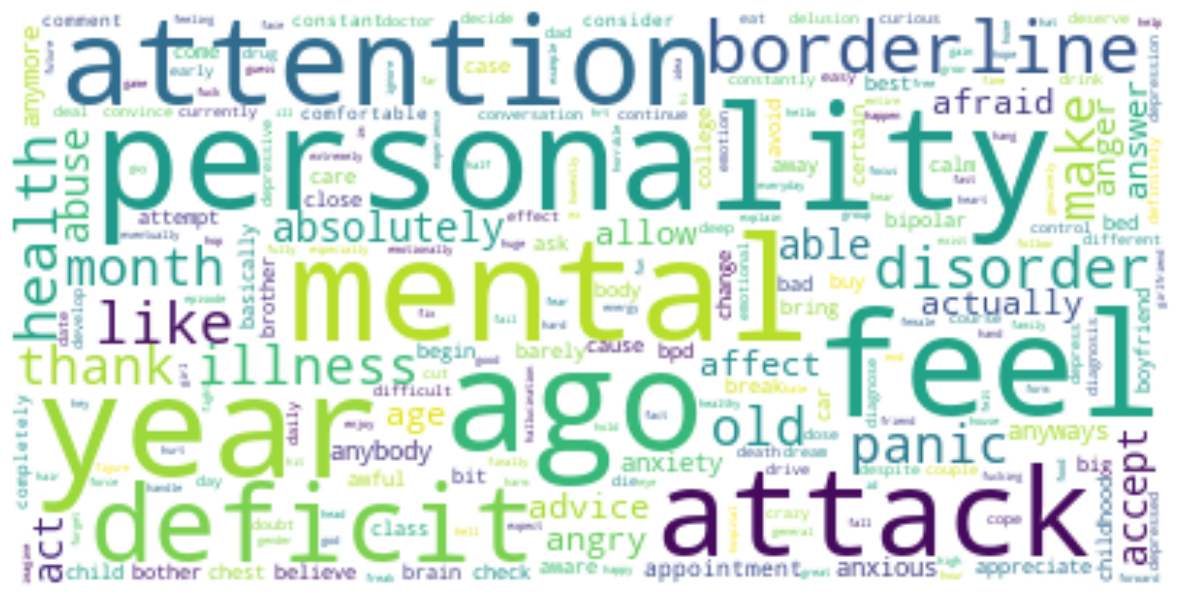

In [14]:
# Word Cloud Using Tf-IDF
features = " ".join(review for review in tfidf_vectorizer.get_feature_names_out())
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white", stopwords=english_stop_words).generate(
    features)
plt.figure(figsize=[15, 12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3> ANXIETY DISORDER </h3>

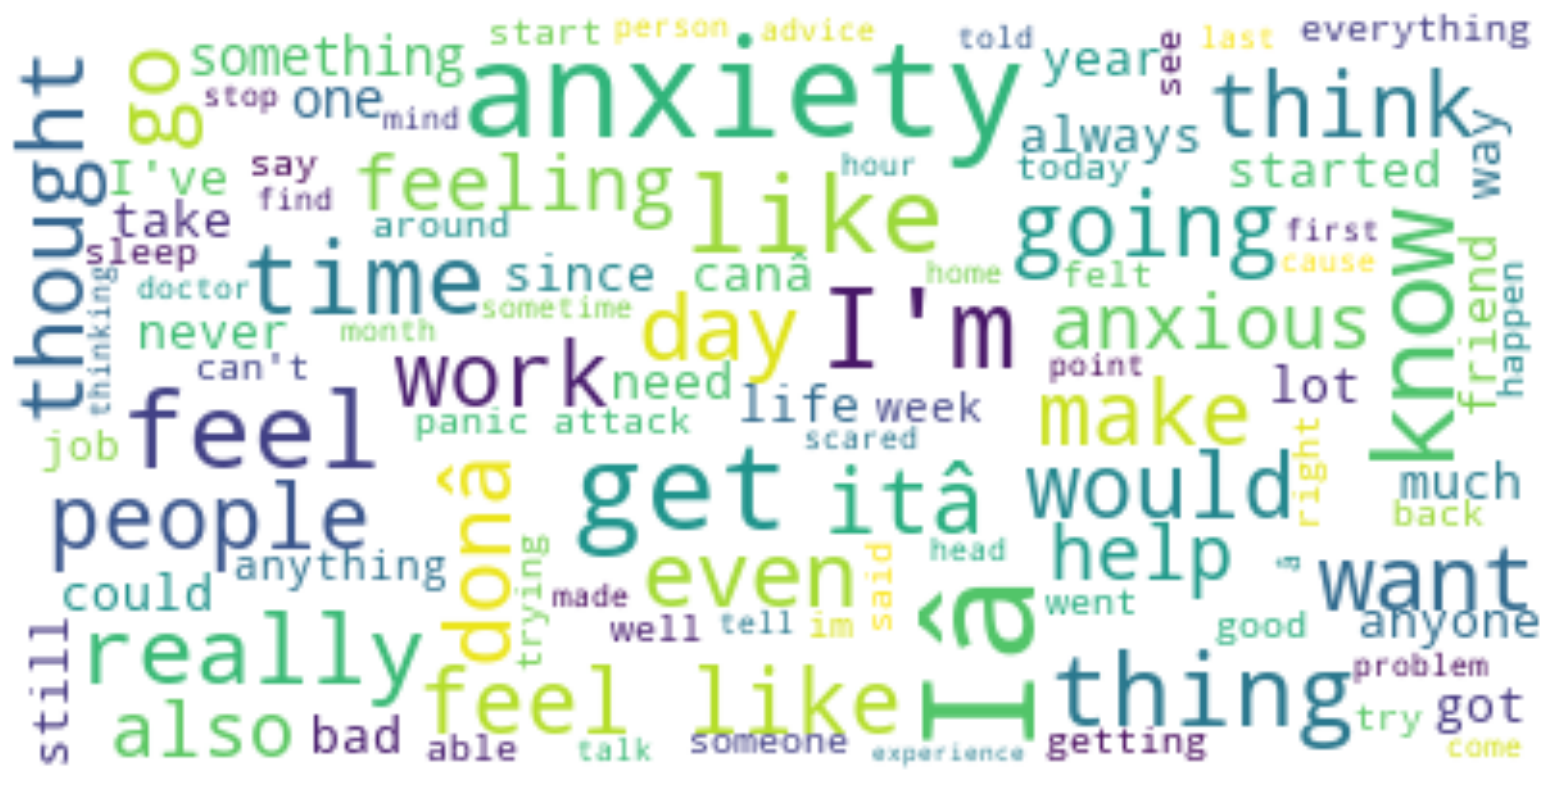

In [15]:
create_word_cloud('Anxiety')

<h3> BIPOLAR DISORDER </h3>

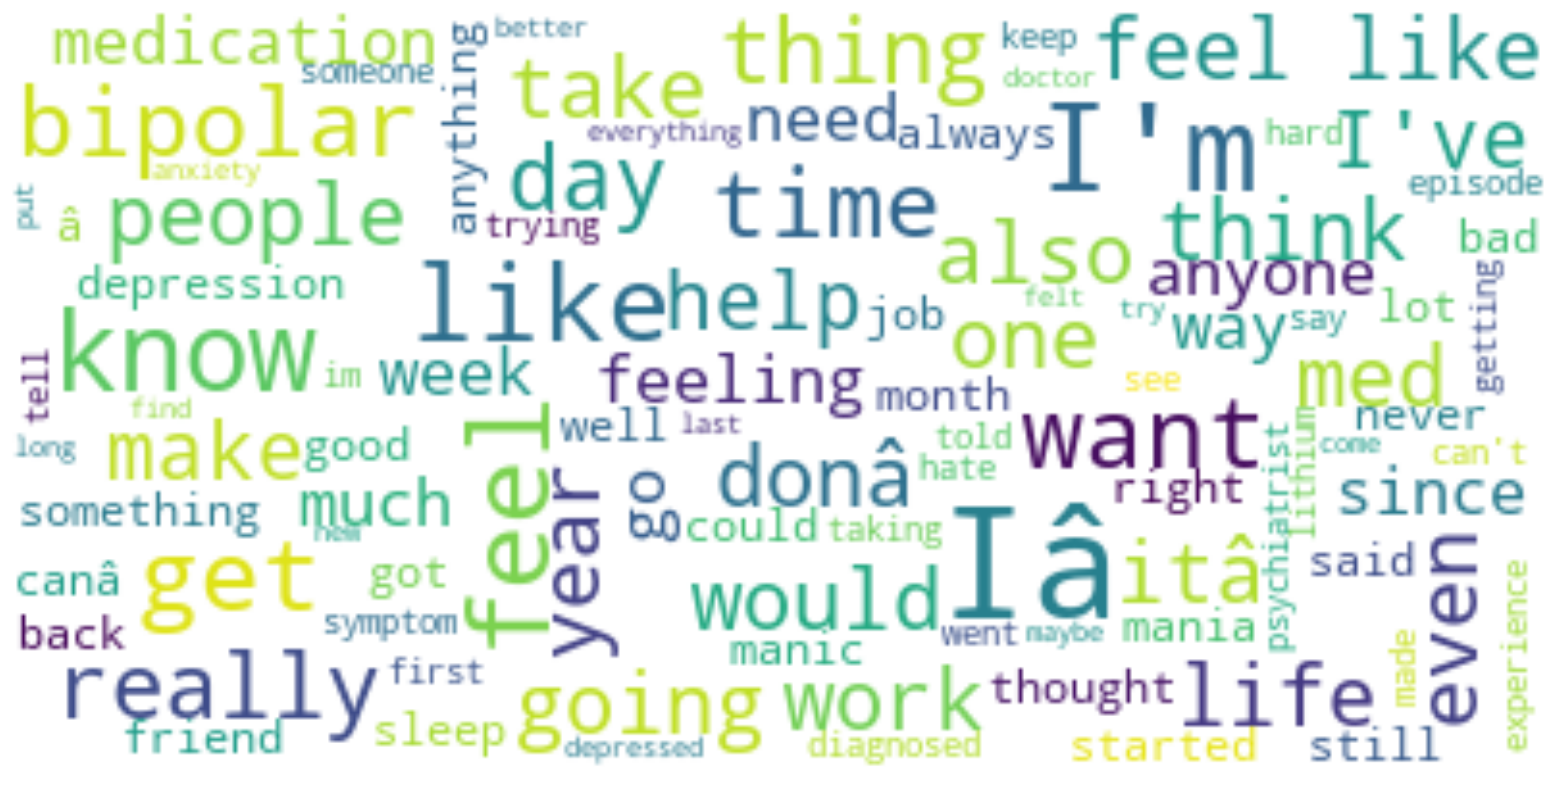

In [16]:
create_word_cloud('Bipolar')

<h3> BORDERLINE PERSONALITY DISORDER </h3>

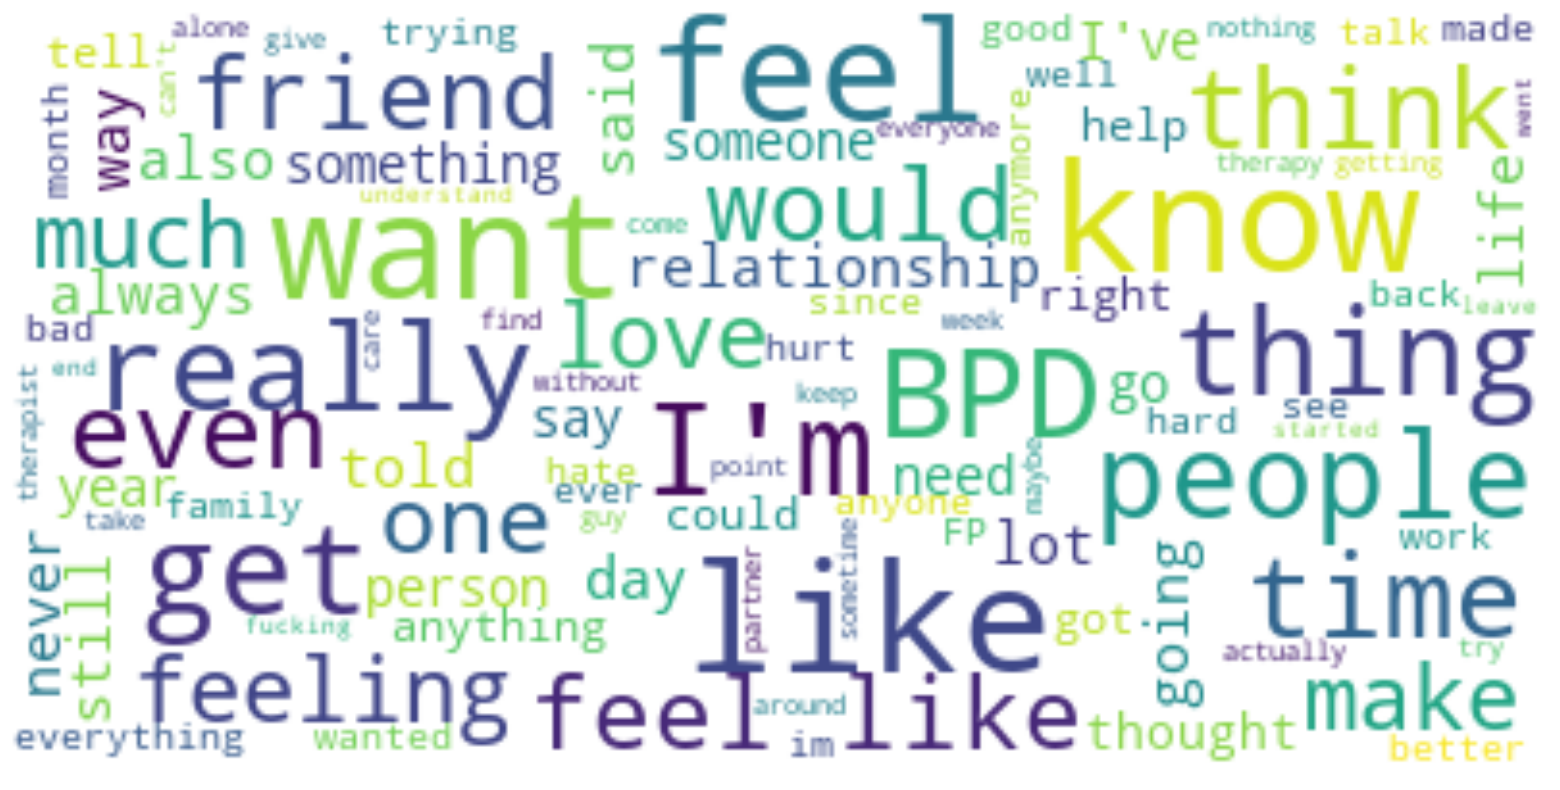

In [17]:
create_word_cloud('Bpd')

<h3> DEPRESSION DISORDER </h3>

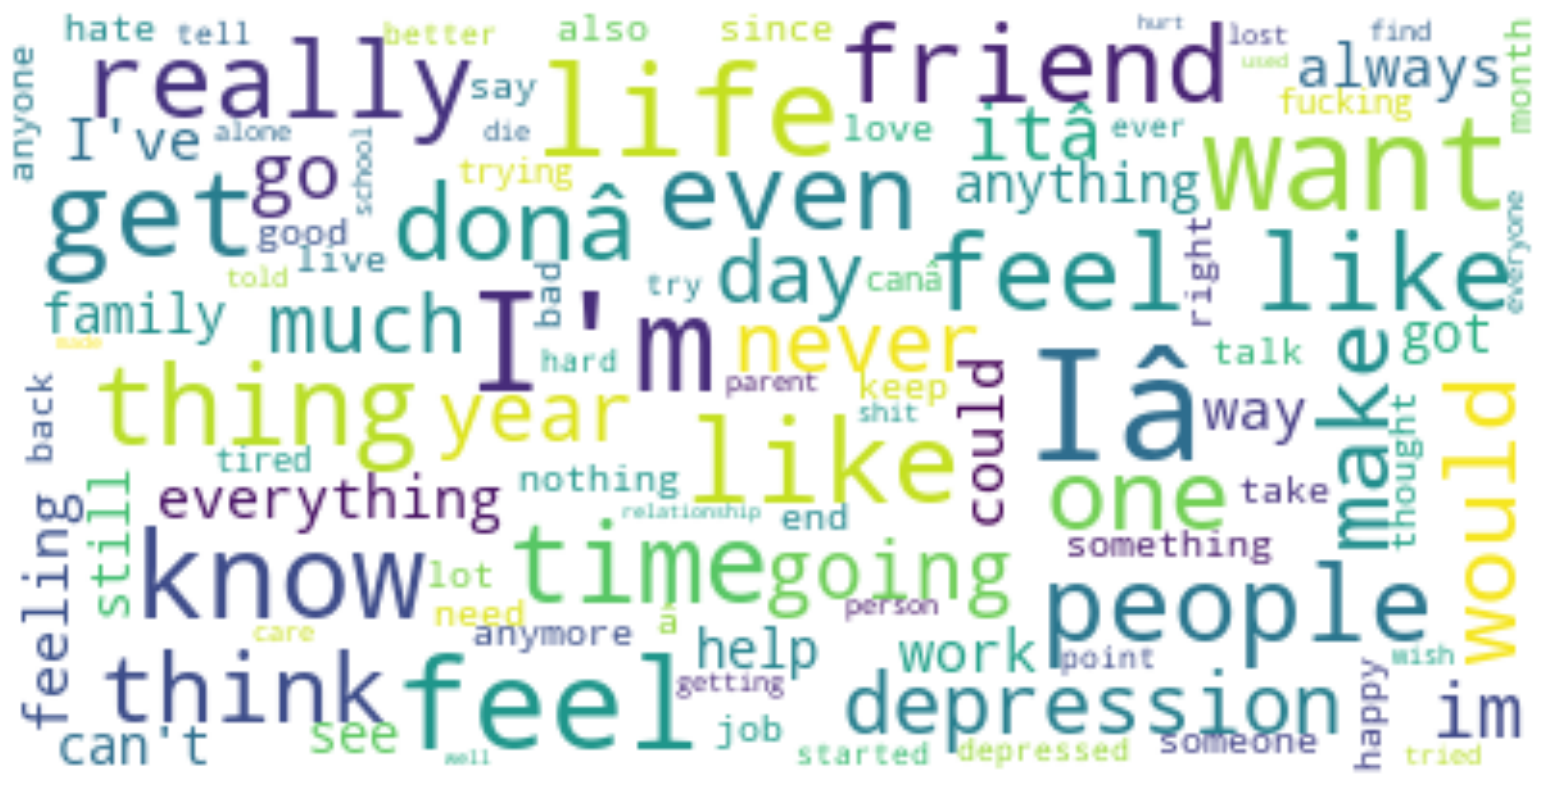

In [18]:
create_word_cloud('Depression')

<h3> EATING DISORDER </h3>

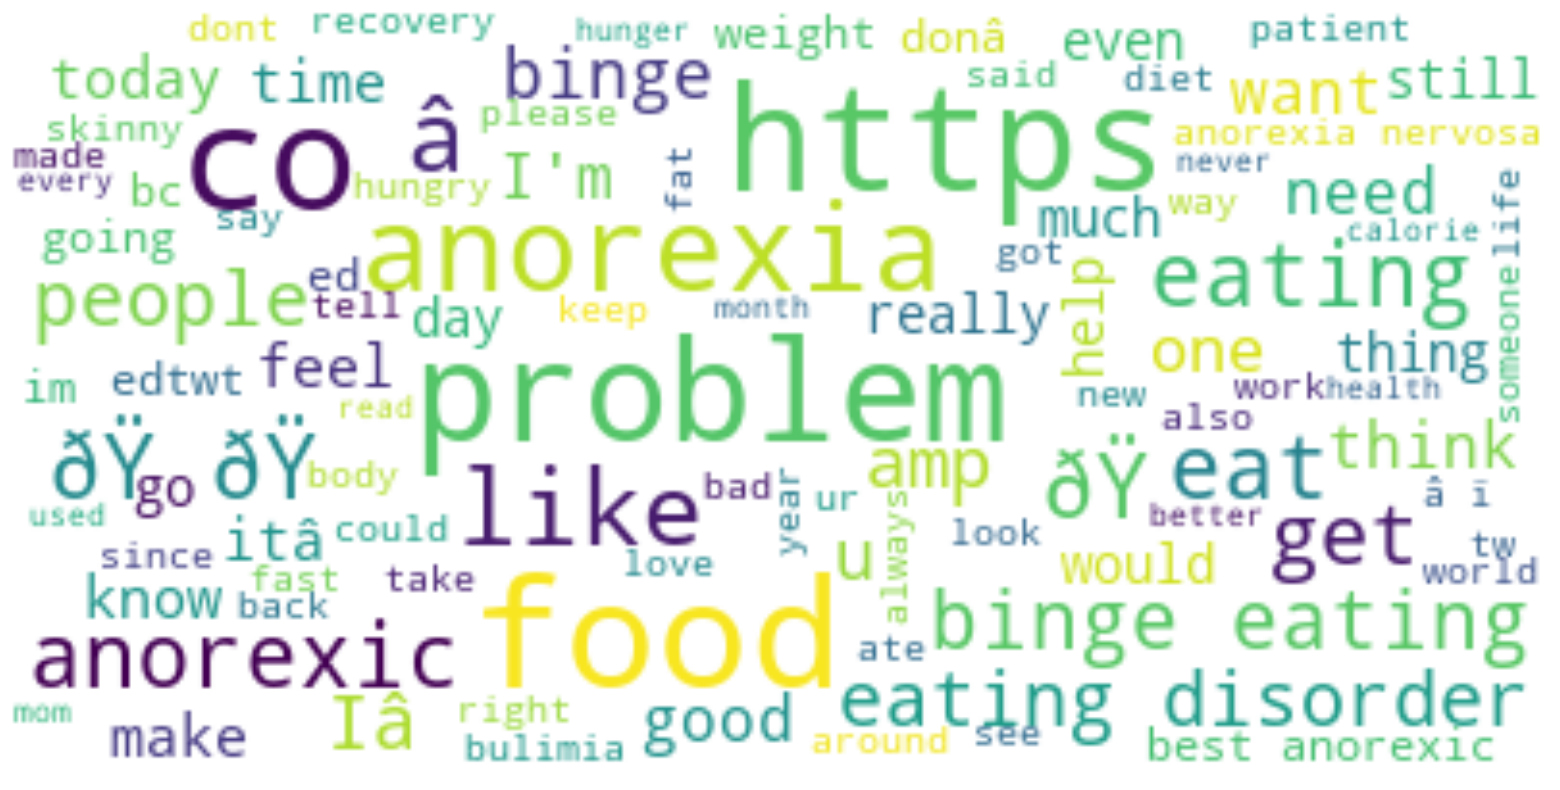

In [19]:
create_word_cloud('Eating_disorder')

<h3> SCHIZOPHRENIA DISORDER </h3>

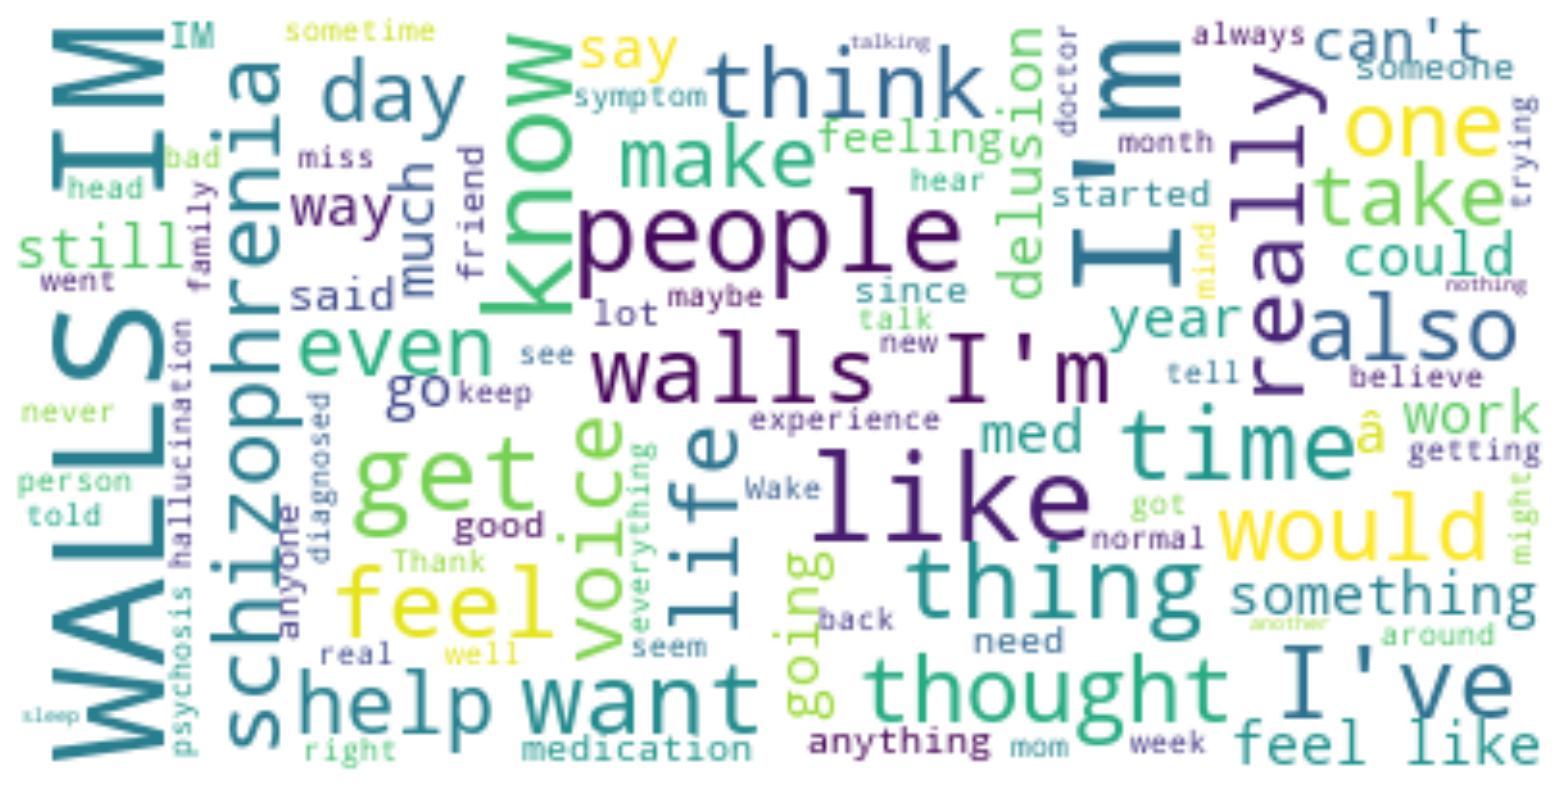

In [20]:
create_word_cloud('Schizophrenia')

<h3> SEXUAL & GENDER IDENTITY DISORDER </h3>

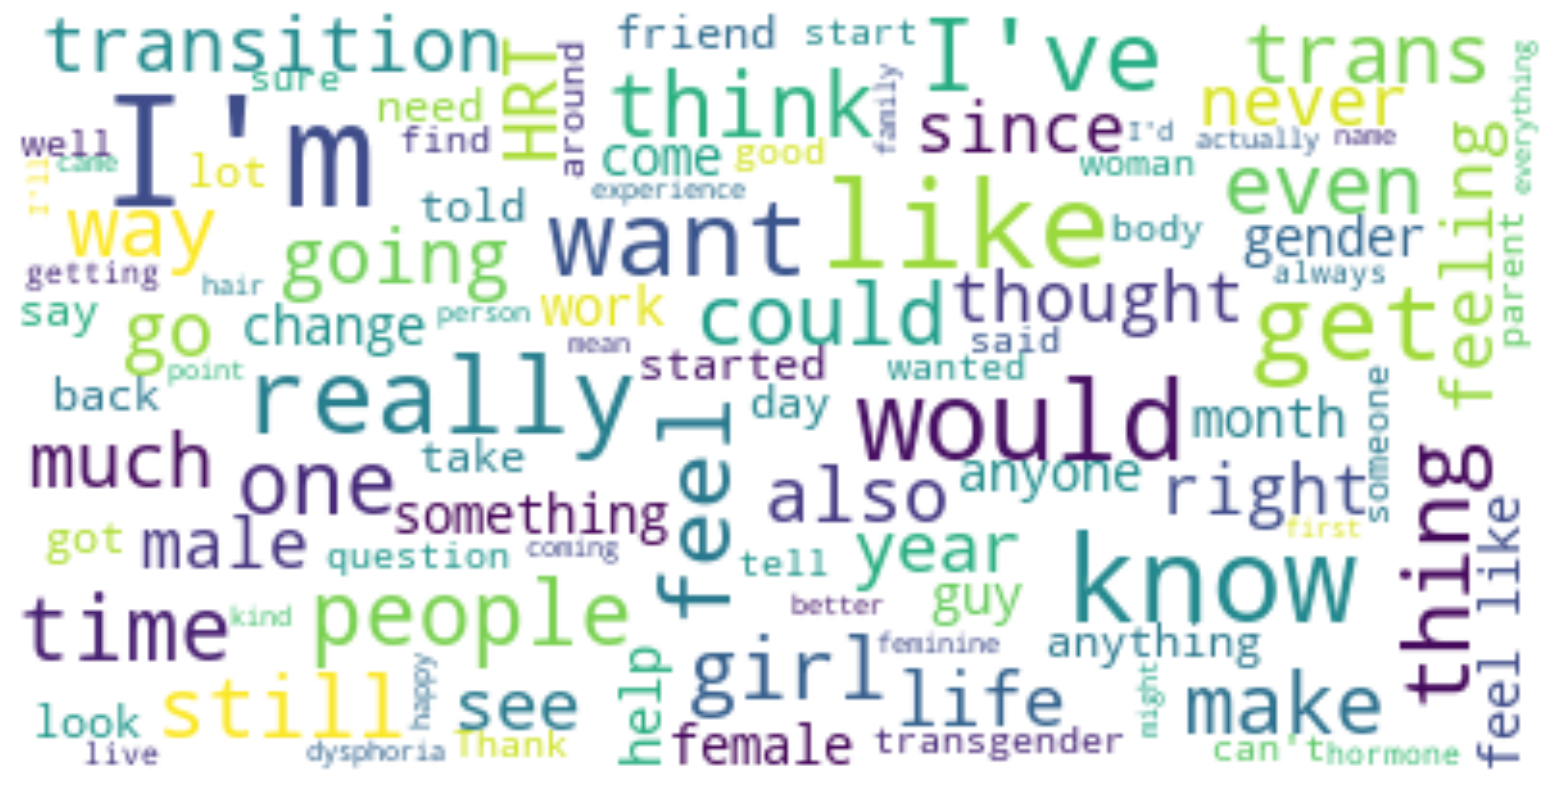

In [21]:
create_word_cloud('Gender_Dysphoria_Disorder')

<h3> GENERAL MENTAL HEALTH DISORDER </h3>

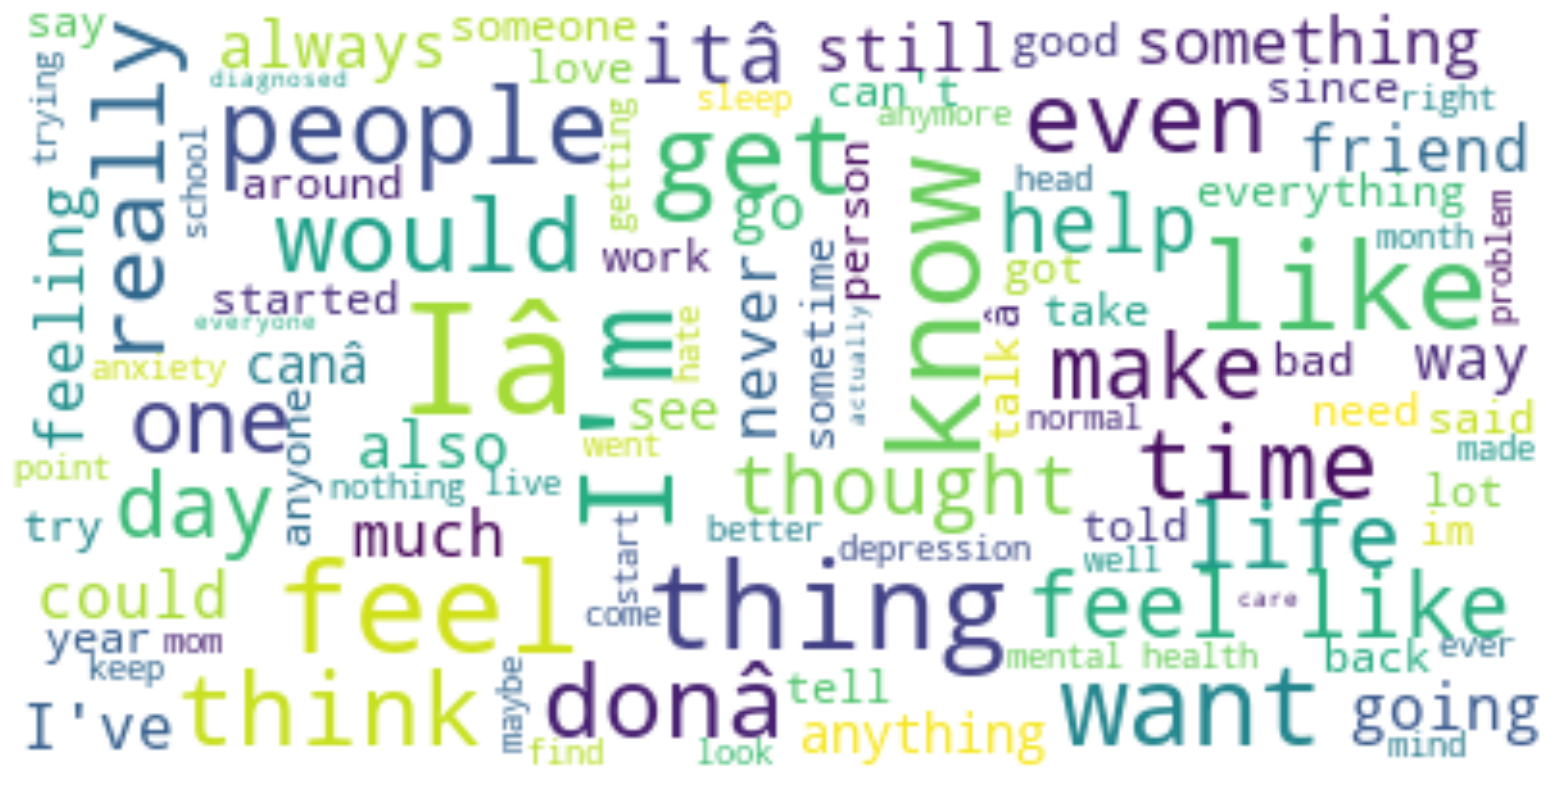

In [22]:
create_word_cloud('General_disorder')

<br><br><br><center><h2> Context Count Distribution per mental health disorder </h2></center>    <br>
A <b>word cloud</b> is a data visualization technique that shows the most used words in a list given as input. If you wish to see the word cloud images make sure you have set the variable <i>print_word_cloud_per_disorder</i> to <b>True</b>

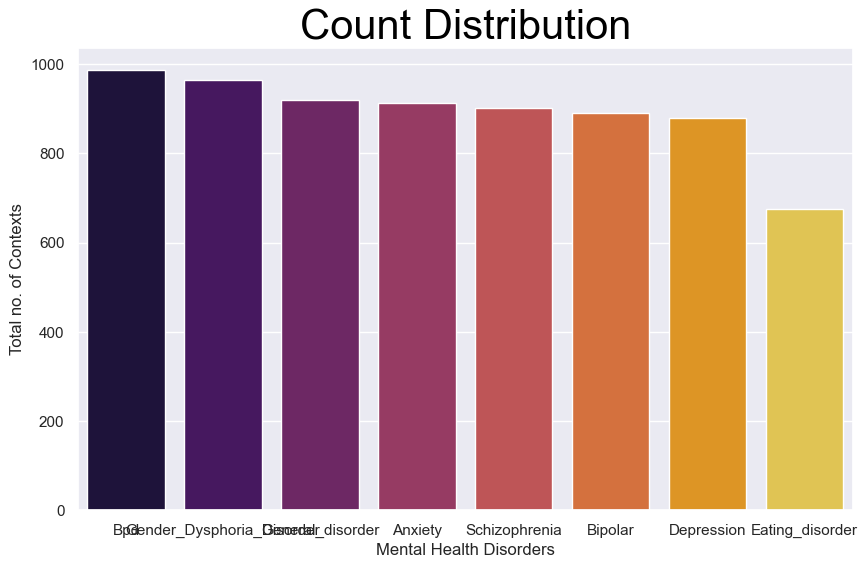

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=[10,6])
sns.countplot(data =  merged_dataframes,
              x = 'mental_health_disorder', 
              palette = 'inferno',
              order = merged_dataframes['mental_health_disorder'].value_counts().index,
              dodge = False)
plt.title('Count Distribution', fontdict={'fontsize': 30, 'fontweight': 5, 'color': 'Black'})
plt.xlabel("Mental Health Disorders")
plt.ylabel("Total no. of Contexts")
plt.show()

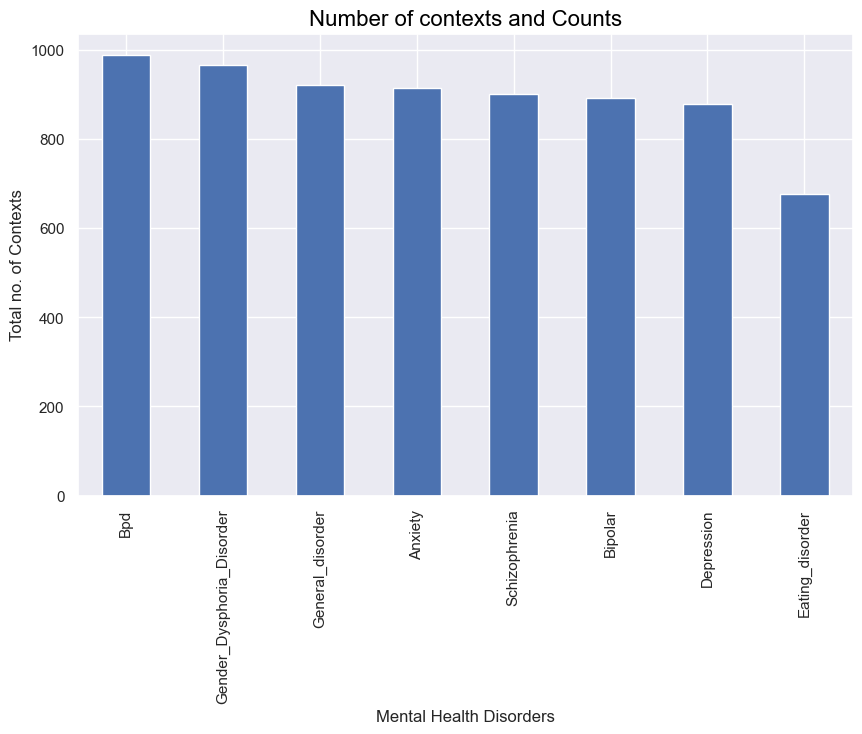

In [24]:
plt.figure(figsize=[10,6])
brand_counts = merged_dataframes.groupby('mental_health_disorder').count()['text'].sort_values(ascending=False)
brand_counts.plot.bar()
plt.title('Number of contexts and Counts', fontdict={'fontsize': 16, 'fontweight': 4, 'color': 'black'})
plt.xlabel("Mental Health Disorders")
plt.ylabel("Total no. of Contexts")
plt.show()